In [1]:
import pandas as pd
import numpy as np
import os
from os import listdir
from os import path
import shutil
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [2]:
def GetStandardScaler(trainData, testData):
    standard_scaler = preprocessing.StandardScaler()
    x_train_ss = standard_scaler.fit_transform(trainData)
    x_test_ss = standard_scaler.transform(testData)
    return x_train_ss, x_test_ss


def SVMLearning(x_train, x_test, y_train, y_test, cols, percent):
    global datedAccuracy
    clf = SVC(gamma='auto', kernel='linear')
    clf.fit(x_train, y_train)
    yhat = clf.predict(x_test)
    acc = np.mean(yhat == y_test)
    f1Score = f1_score(y_test, yhat, average='weighted')
    print("Accuracy with SVM standard-scaled data: ",acc * 100)
    print("F1 Score: ",f1Score * 100)
    #datedAccuracy[percent] = acc * 100
    datedAccuracy[percent] = acc
    datedF1Score[percent] = f1Score * 100

    importance = (clf.coef_).reshape((len(cols),))
    features_sorted = np.array(cols)[np.argsort(importance)[::-1]]
    print(features_sorted[:5])
    datedFeatures[percent] = features_sorted[:5]

baseDir = 'Processed-Dataset'
listDir = [f for f in listdir(baseDir)]
listDir.sort()
datedAccuracy = dict()
datedF1Score = dict()
datedFeatures = dict()

for dir in listDir:
    x_train_df = pd.read_csv(os.path.join(baseDir, dir, 'x_train.txt'), sep=",")
    x_test_df = pd.read_csv(os.path.join(baseDir, dir, 'x_test.txt'), sep=",")
    cols = list(x_train_df.columns)

    y_train = np.loadtxt(os.path.join(baseDir, dir, 'y_train.txt'))
    y_test = np.loadtxt(os.path.join(baseDir, dir, 'y_test.txt'))

    x_train = x_train_df.to_numpy()
    x_test = x_test_df.to_numpy()

    print('\nResults for %s --' %(dir))
    x_train_ss, x_test_ss = GetStandardScaler(x_train, x_test)
    SVMLearning(x_train_ss, x_test_ss, y_train, y_test, cols, dir)


Results for 1 --
Accuracy with SVM standard-scaled data:  98.31460674157303
F1 Score:  98.48074522231826
['minFlt' 'flags' 'AXIWRITE' 'rtPriority' 'L2STORE']

Results for 10 --
Accuracy with SVM standard-scaled data:  100.0
F1 Score:  100.0
['ioac_wchar' 'se_prevSumExecRuntime' 'DCHASHMISS' 'minFlt' 'IISSUE']

Results for 100 --
Accuracy with SVM standard-scaled data:  98.57954545454545
F1 Score:  98.57953399029886
['ioac_wchar' 'ioac_syscw' 'se_prevSumExecRuntime' 'AXIREAD' 'BPREDTAKEN']

Results for 11 --
Accuracy with SVM standard-scaled data:  98.9795918367347
F1 Score:  98.9795918367347
['ioac_wchar' 'se_prevSumExecRuntime' 'IISSUE' 'se_vruntime' 'PCINST']

Results for 12 --
Accuracy with SVM standard-scaled data:  95.95959595959596
F1 Score:  96.03588681849551
['ioac_wchar' 'se_prevSumExecRuntime' 'DCALIAS' 'ioac_syscw' 'AXIREAD']

Results for 13 --
Accuracy with SVM standard-scaled data:  97.98994974874373
F1 Score:  97.94994489654229
['minFlt' 'se_prevSumExecRuntime' 'ioac_wch

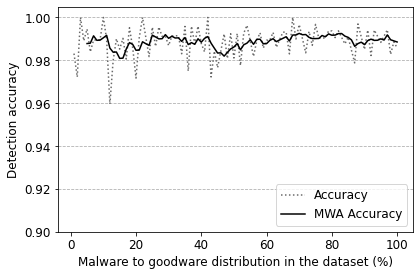

In [7]:
orderedPercent = []
orderedAccuracy = []

for i in range (1, 101):
    orderedPercent.append(i)

for percent in orderedPercent:
    orderedAccuracy.append(datedAccuracy[str(percent)])

plt.figure()
plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "Times New Roman"
plt.plot(orderedPercent, orderedAccuracy, ':', label='Accuracy', color='dimgrey')
plt.grid(axis='y', linestyle='--')
plt.xlabel('Malware to goodware distribution in the dataset (%)')
plt.ylabel('Detection accuracy')
#plt.title('Spatial Bias')

axes = plt.gca()
#axes.set_ylim([90,100.5])
axes.set_ylim([0.9,1.005])

# Moving window mean
df = pd.DataFrame()
df['x'] = orderedPercent
df['y'] = orderedAccuracy
rolling_mean = df.y.rolling(window=5).mean()
plt.plot(df.x, rolling_mean, color='black', label='MWA Accuracy')
plt.legend(loc=4)

plt.tight_layout()
plt.savefig("spatial-bias.pdf", bbox_inches='tight', dpi=600)
plt.savefig("spatial-bias.png", bbox_inches='tight', dpi=600)
plt.show()
